# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np

# Suprimindo avisos que não são necessários
# warnings.filterwarnings('ignore')

df_renda = pd.read_csv('previsao_de_renda.csv')

# Exibindo as primeiras linhas para verificar os dados
print(df_renda.head())

   Unnamed: 0    data_ref  index sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01   8682    F             False             True   
1           1  2015-01-01  12830    M              True             True   
2           2  2015-01-01   2885    M              True             True   
3           3  2015-01-01  16168    F              True            False   
4           4  2015-01-01  12438    M             False            False   

   qtd_filhos   tipo_renda           educacao estado_civil tipo_residencia  \
0           1  Assalariado         Secundário       Casado            Casa   
1           0   Empresário         Secundário       Casado            Casa   
2           2  Assalariado  Superior completo       Casado            Casa   
3           0   Empresário         Secundário       Casado            Casa   
4           0  Assalariado         Secundário       Casado            Casa   

   idade  tempo_emprego  qt_pessoas_residencia    mau    renda  
0     36 

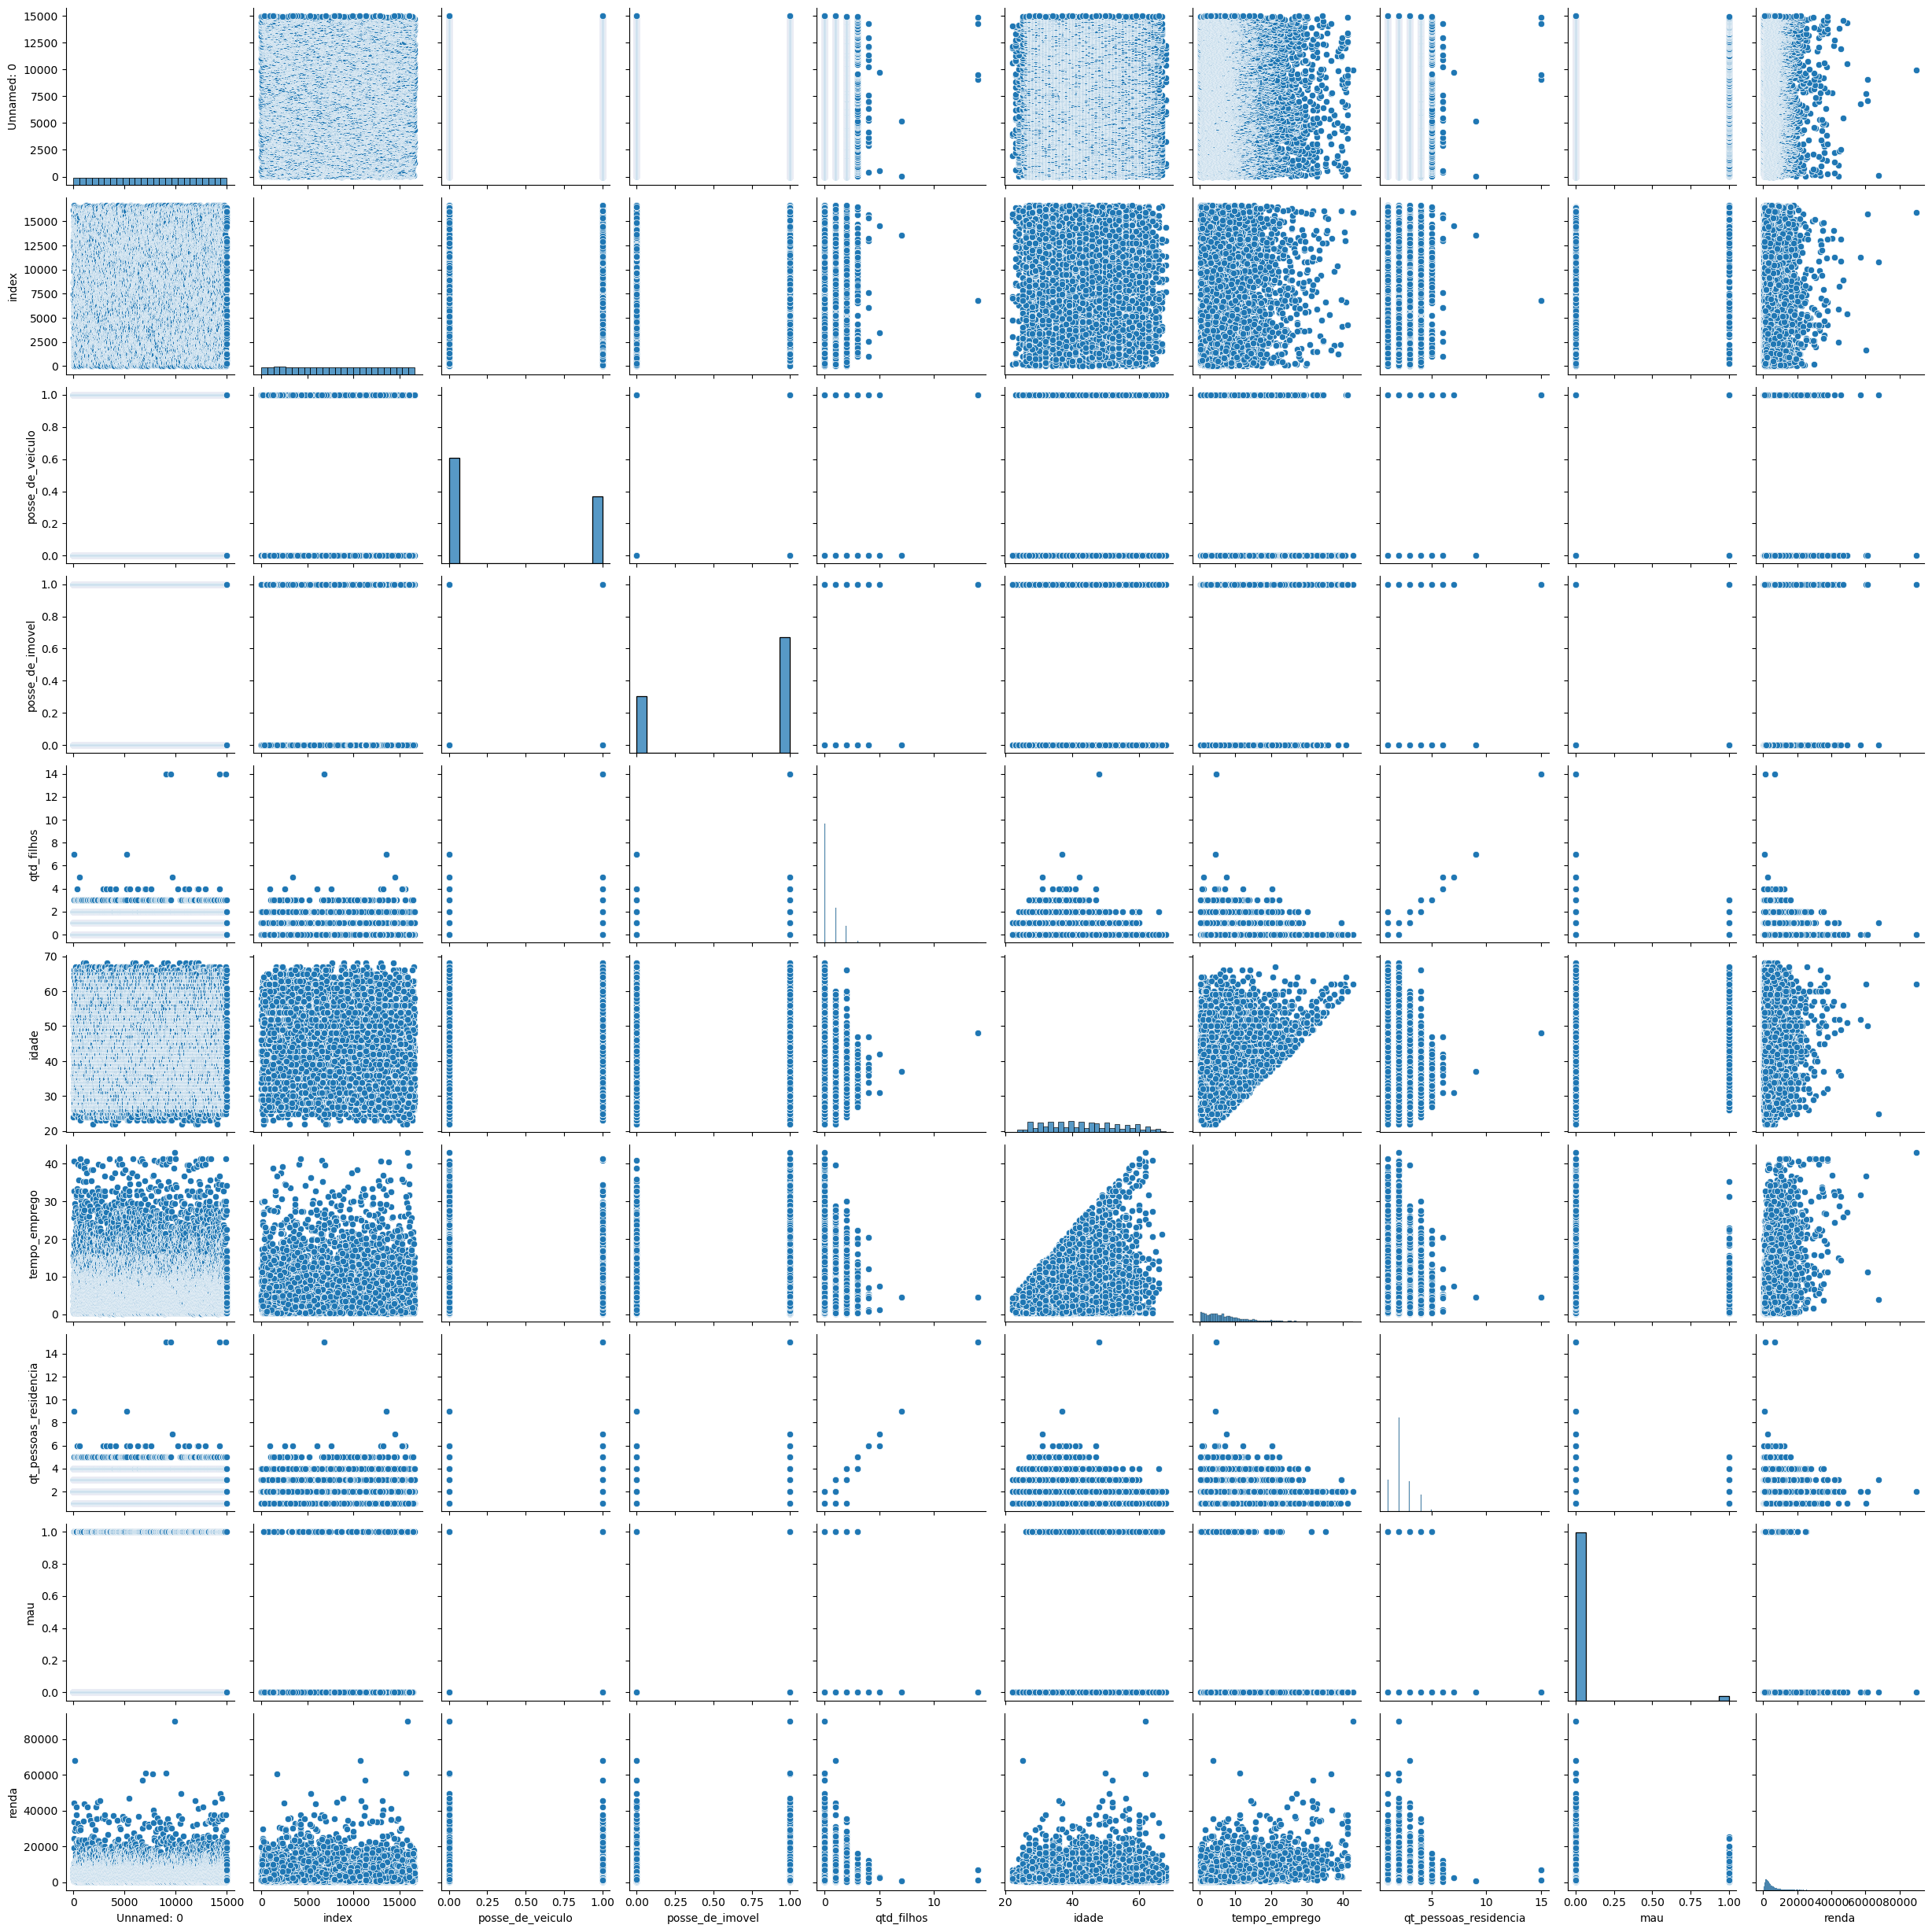

In [18]:
sns.pairplot(df_renda)
plt.show()

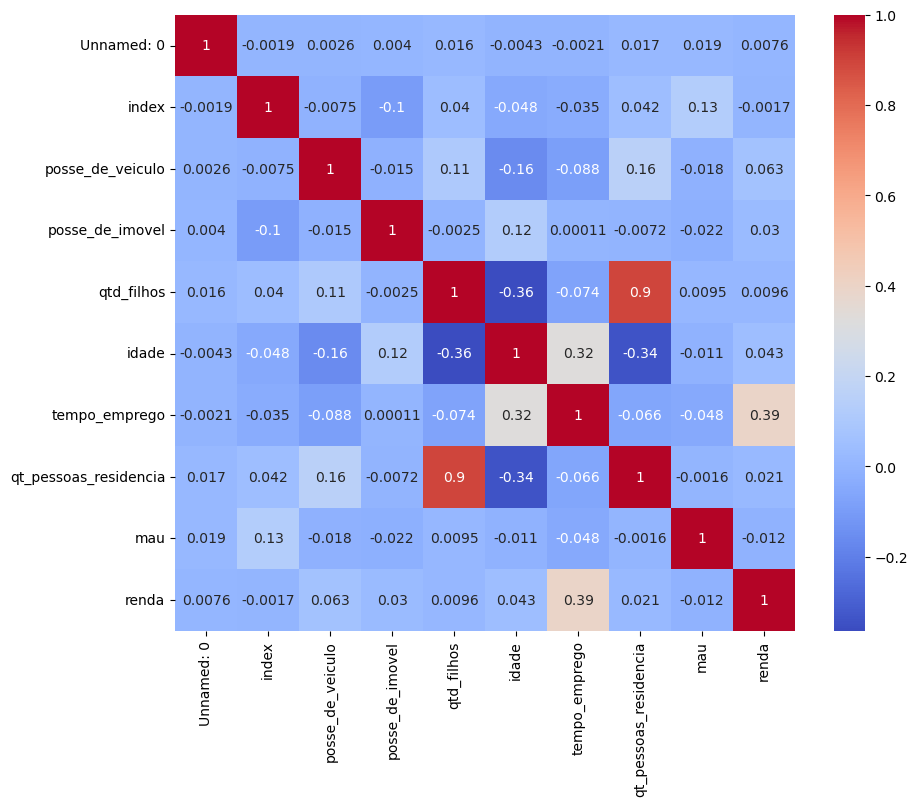

In [15]:
# Calculando a matriz de correlações
correlacao = df_renda.corr()

# Exibindo a matriz de correlações com um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap="coolwarm")
plt.show()

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

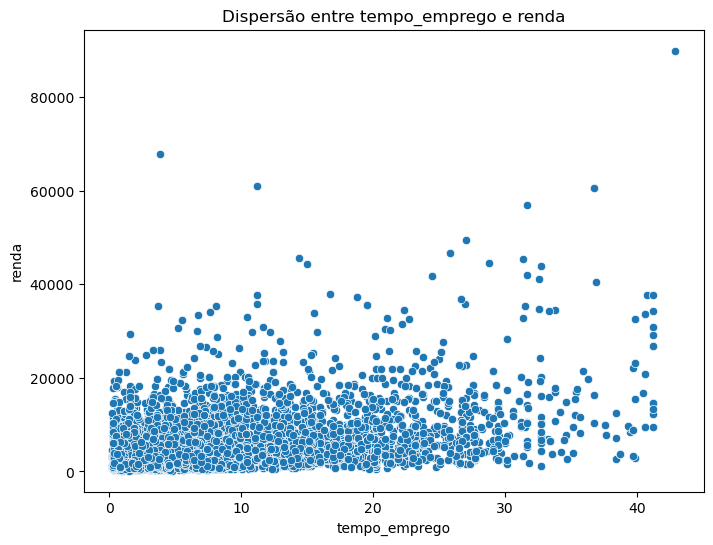

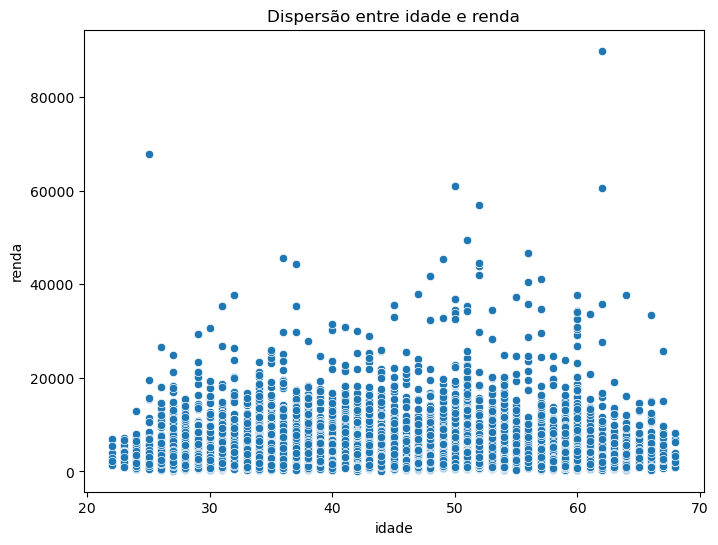

In [20]:
# Convertendo algumas colunas de string para bool/int, conforme necessário
df['sexo'] = df['sexo'].map({'F': 0, 'M': 1})
df['posse_de_veiculo'] = df['posse_de_veiculo'] == 'VERDADEIRO'
df['posse_de_imovel'] = df['posse_de_imovel'] == 'VERDADEIRO'
df['mau'] = df['mau'] == 'VERDADEIRO'

# Calculando a matriz de correlação
correlation_matrix = df.corr()

# Pegando as correlações específicas para "renda"
renda_correlations = correlation_matrix['renda'].sort_values(ascending=False)

# As duas variáveis mais correlacionadas com "renda" (excluindo a própria "renda")
top_2_vars = renda_correlations.index[1:3]

for var in top_2_vars:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=var, y='renda')
    plt.title(f"Dispersão entre {var} e renda")
    plt.show()

3) Na su aopinião, há outliers na variável renda?

### Sim, existem outliers.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

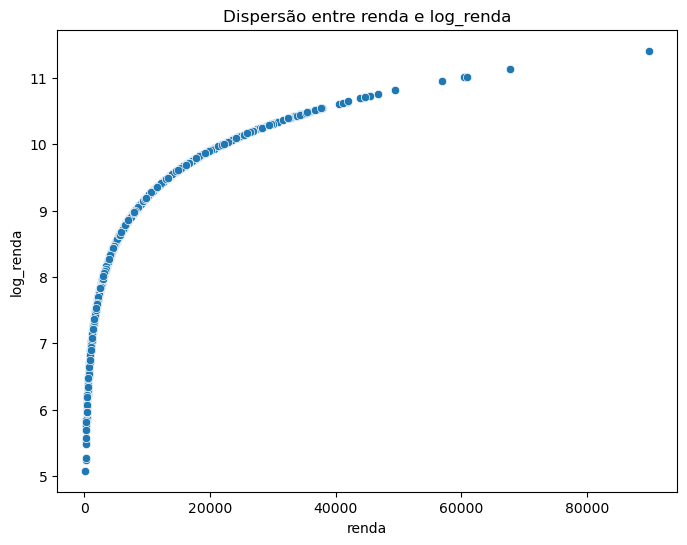

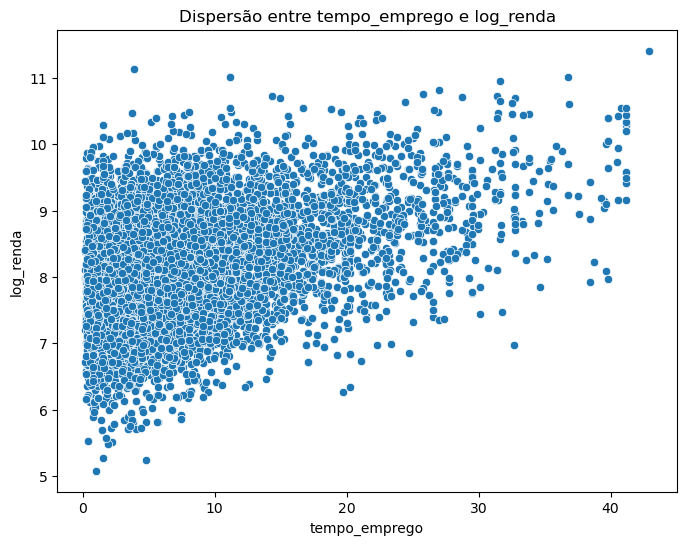

In [23]:
# 1. Calcular o logaritmo da variável renda.
df['log_renda'] = np.log(df['renda'] + 1)  # Adicionamos 1 para evitar logaritmo de zero

# 2. Recalcular a matriz de correlação
correlation_matrix_log = df.corr()

# Pegando as correlações específicas para "log_renda"
log_renda_correlations = correlation_matrix_log['log_renda'].sort_values(ascending=False)

# As duas variáveis mais correlacionadas com "log_renda" (excluindo a própria "log_renda")
top_2_vars_log = log_renda_correlations.index[1:3]

# 3. Analisar graficamente
for var in top_2_vars_log:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=var, y='log_renda')
    plt.title(f"Dispersão entre {var} e log_renda")
    plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

### Sim, a análise ficou melhor.